# Exploratory Data Analysis and Model Building - Bank Marketing Campaign"

##### Data description - This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\RPH\Downloads\bank (1).csv")

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.shape

(11162, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
for col in df.select_dtypes(include = 'object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


###### Data Description - 

###### This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

###### Feature

###### 1. age | int64 | age in years
2. job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar
3. marital | object | marital status (categorical: ['married' 'single' 'divorced'])
"4. education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])
5. default | Object | has credit in default?  (categorical: ['no' 'yes'])
6. balance | int64 | Balance of the individual
7. housing | object | has housing loan? (categorical: ['yes' 'no'])
8. loan | object | has personal loan? (categorical: ['no' 'yes'])
"9. contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])
10. day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])
12. duration | int64 | last contact duration, in seconds (numeric)
13. campaign | int64 | number of contacts performed during this campaign and for this client
14. pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous | int64 | number of contacts performed before this campaign and for this client
16. poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

## Exploratory Data Analysis

###### - Find Unwanted Columns\n",
    - Find Missing Values
    - Find Features with one value
    - Explore the Categorical Features
    - Find Categorical Feature Distribution
    - Relationship between Categorical Features and Label
    - Explore the Numerical Features
    - Find Discrete Numerical Features
    - Relation between Discrete numerical Features and Labels
    - Find Continous Numerical Features
    - Distribution of Continous Numerical Features
    - Relation between Continous numerical Features and Labels
    - Find Outliers in numerical features
    - Explore the Correlation between numerical features
    - Find Pair Plot
    - Check the Data set is balanced or not based on target values in       classification

### 1. Find Unwanted Columns and missing values

In [8]:
features_na = [features for features in df.columns if df[features].isnull().sum() >0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),'% missing values')
else:
    print('No missing value')

No missing value


#### Find features with one value

In [9]:
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


#### Explore the categorical features

In [10]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtype == 'O') & (feature not in ['deposit'] ))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [11]:
for feature in categorical_features:
    print('The feature is {} and  number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and  number of categories are 12
The feature is marital and  number of categories are 3
The feature is education and  number of categories are 4
The feature is default and  number of categories are 2
The feature is housing and  number of categories are 2
The feature is loan and  number of categories are 2
The feature is contact and  number of categories are 3
The feature is month and  number of categories are 12
The feature is poutcome and  number of categories are 4


#### Find categorical feature distribution

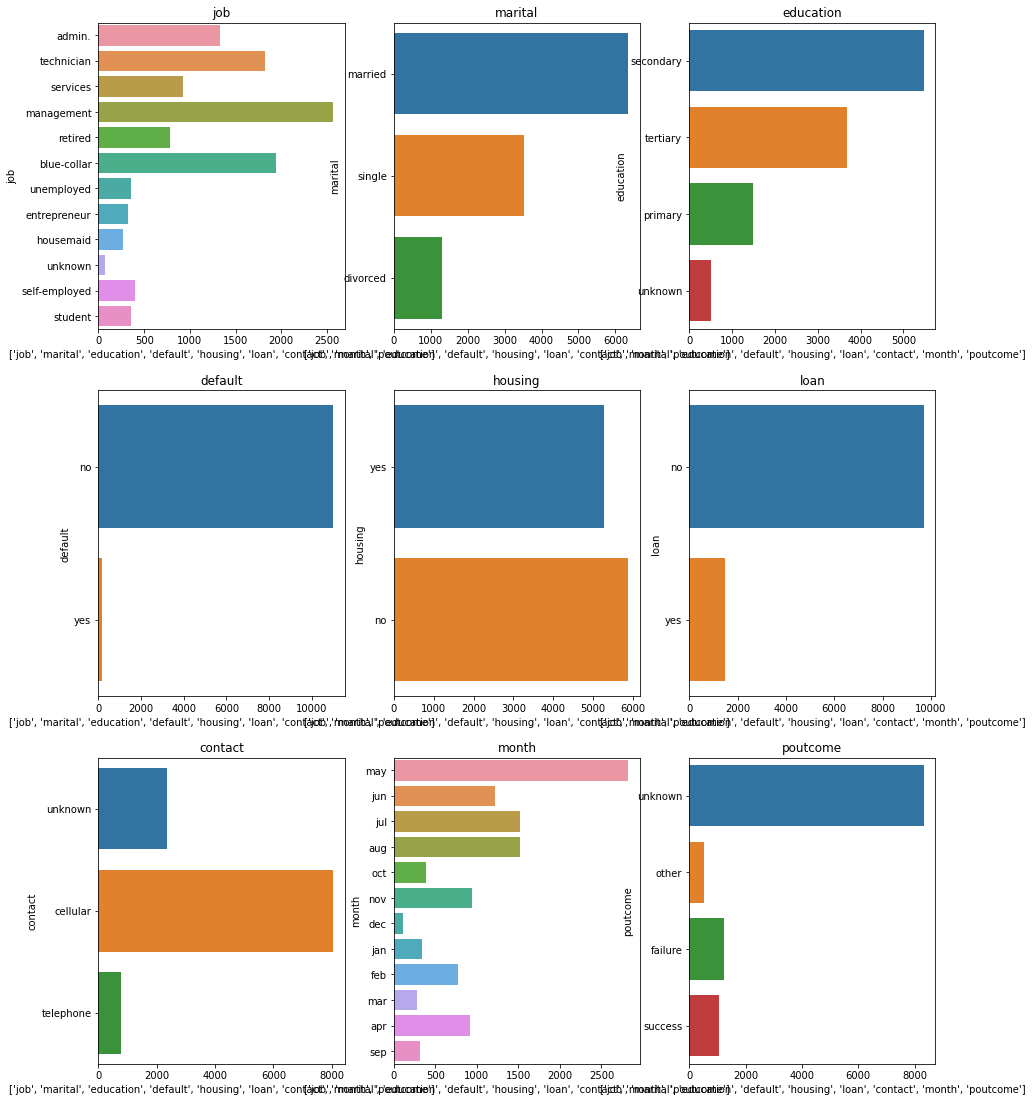

In [12]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data = df)
    plt.xlabel(categorical_features)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

#### Relationship between categorical features and label

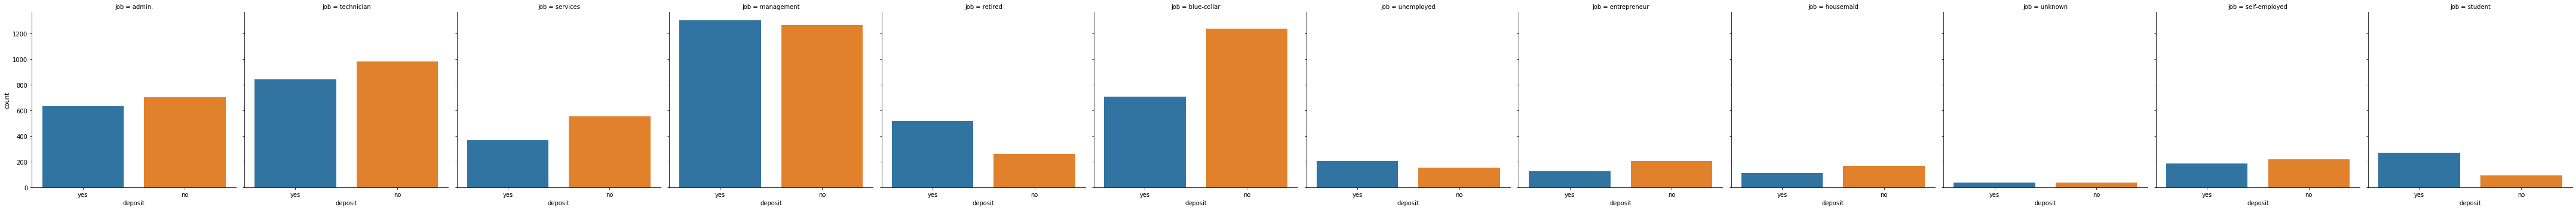

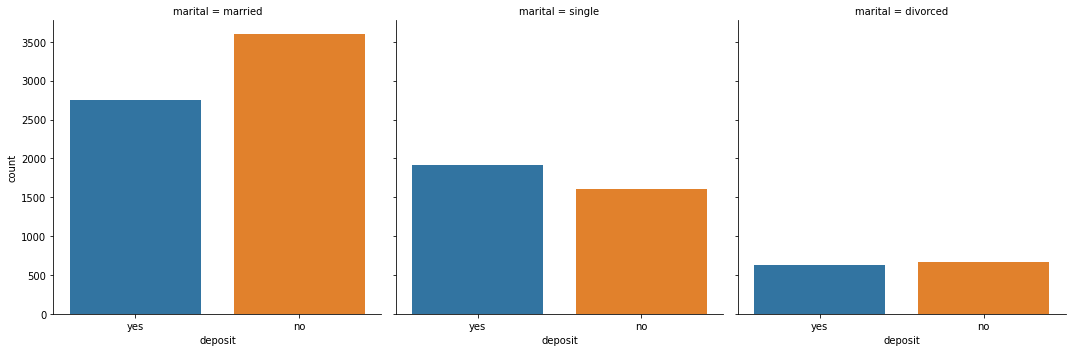

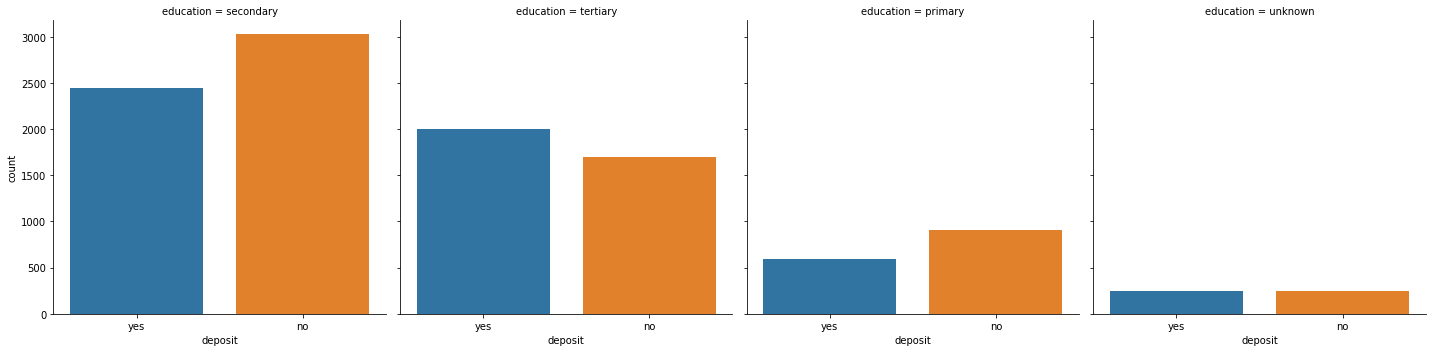

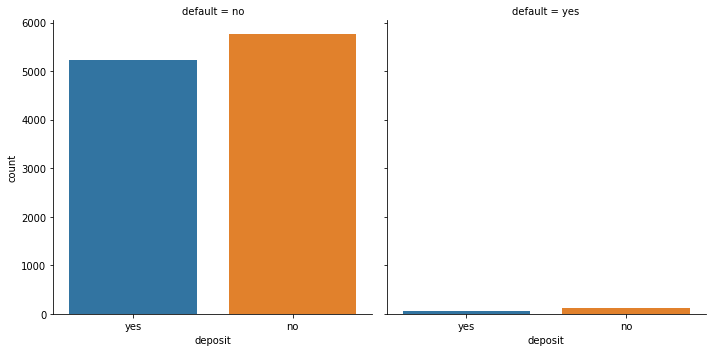

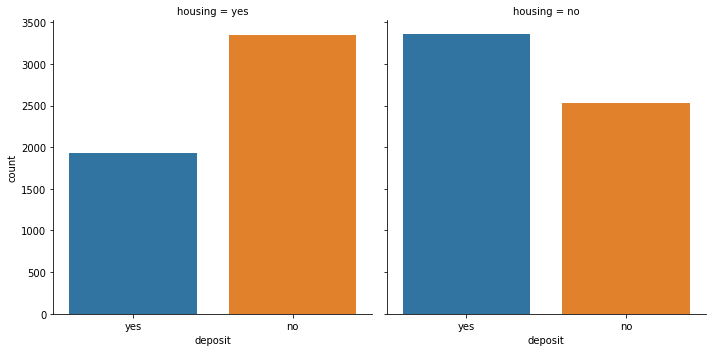

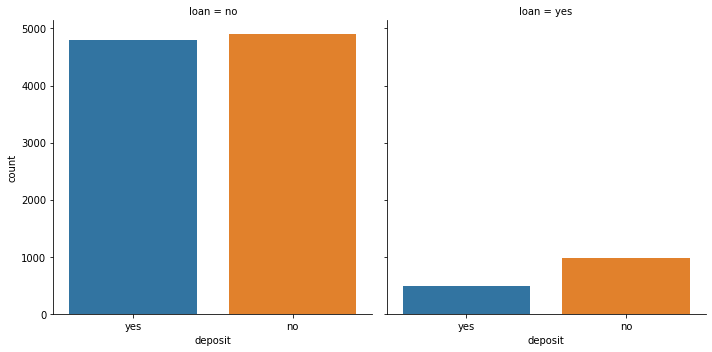

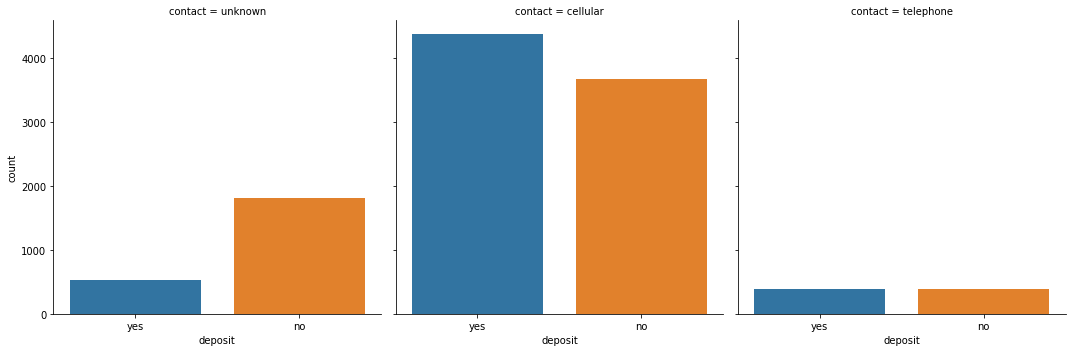

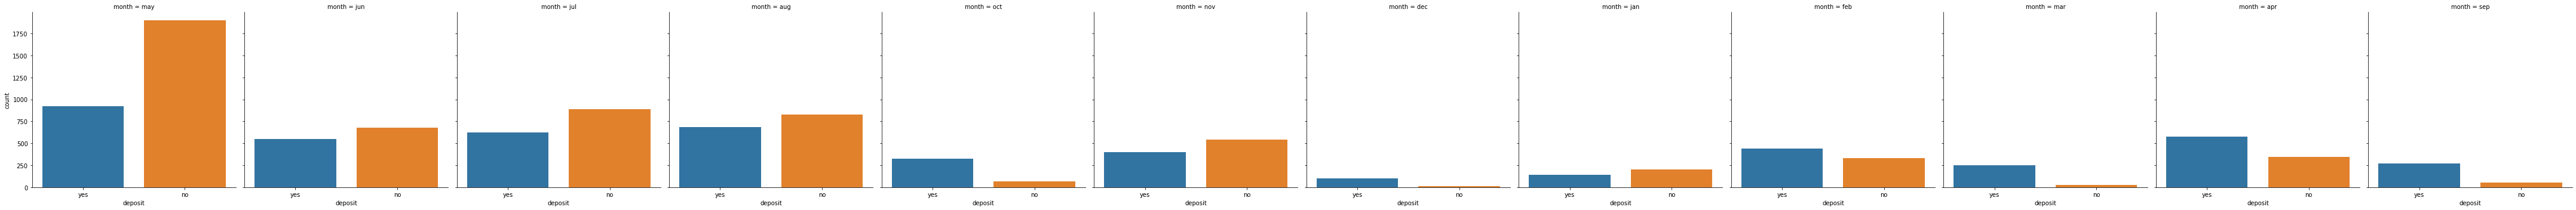

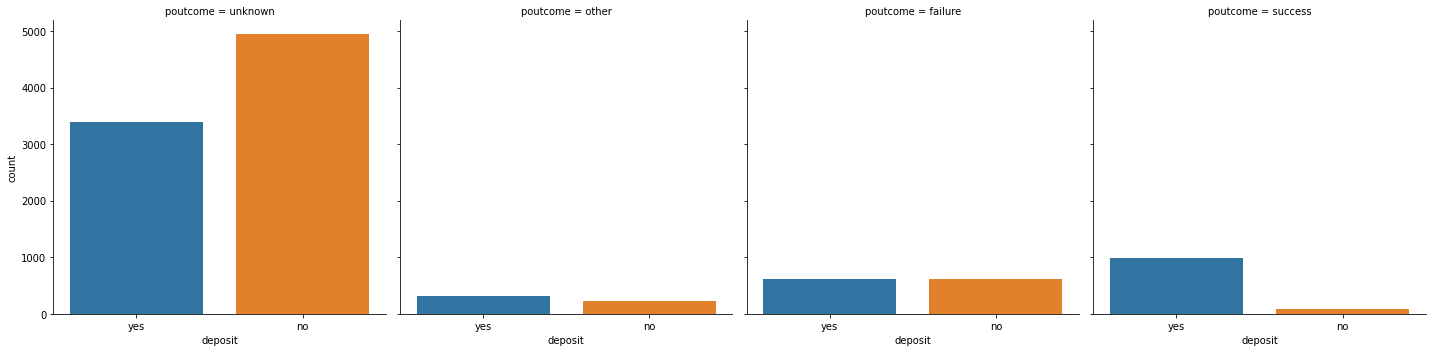

In [13]:
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind ='count', data=df)
plt.show()

In [14]:
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

#### explore the numerical feature

In [15]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ',len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


#### Find discrete numerical features

#### Relation between discrete number features and labels

In [16]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print('Discrete variables count: {}'.format(len(discrete_feature)))

Discrete variables count: 0


In [17]:
continuos_features = [feature for feature in numerical_features if feature not in discrete_feature+['deposit'] ]
print('Continuos variables count: {}'.format(len(continuos_features)))

Continuos variables count: 7


#### Distribution of continuous Numerical features

C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

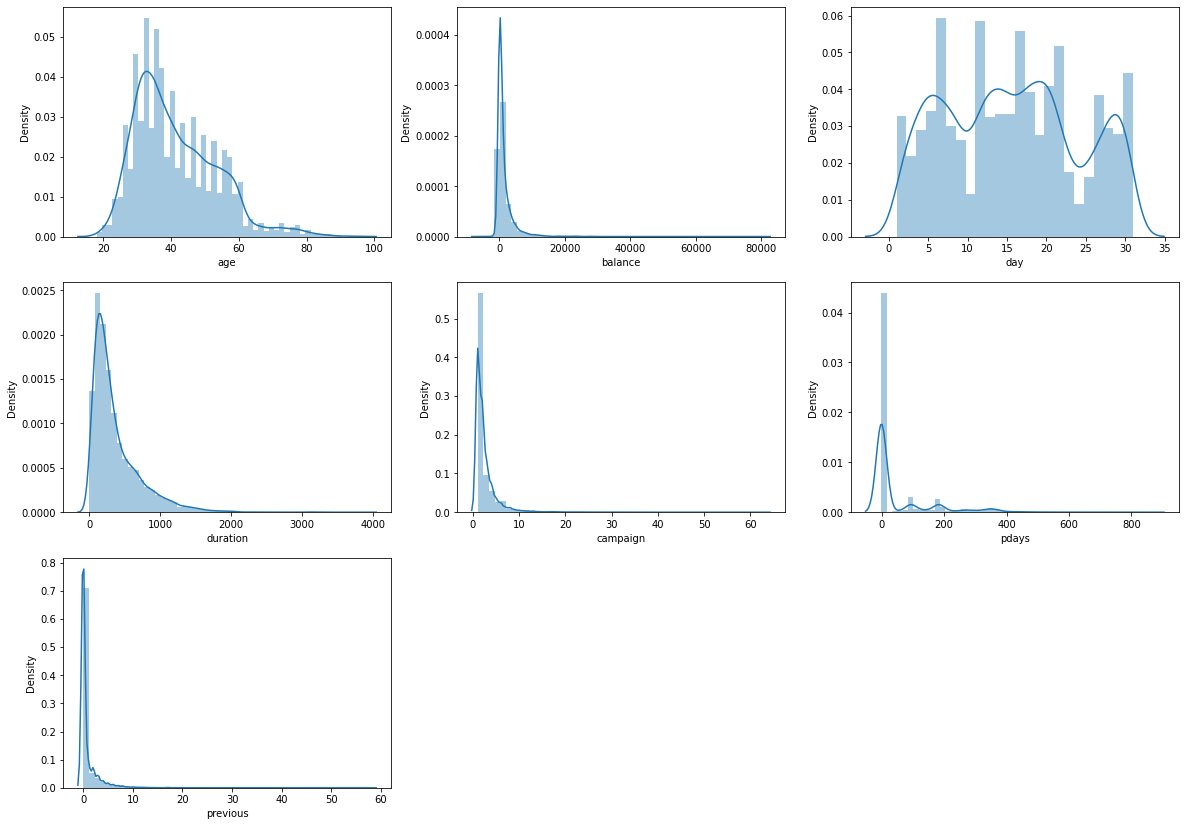

In [18]:
plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber = 1
for continuos_feature in continuos_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuos_feature])
    plt.xlabel(continuos_feature)
    plotnumber+=1
plt.show()

#### Relation between continuous numerical features and label

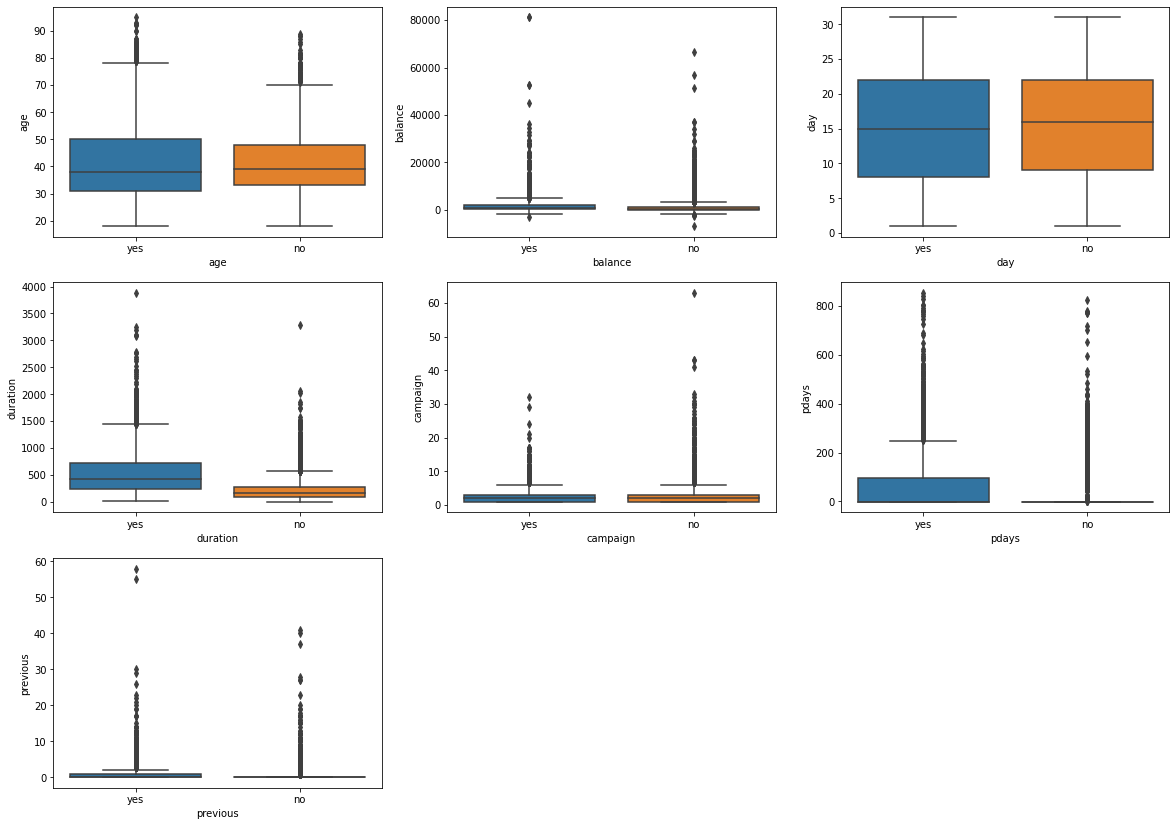

In [19]:
plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber = 1
for feature in continuos_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='deposit', y=df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

#### Find outliners in numerical feature

C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

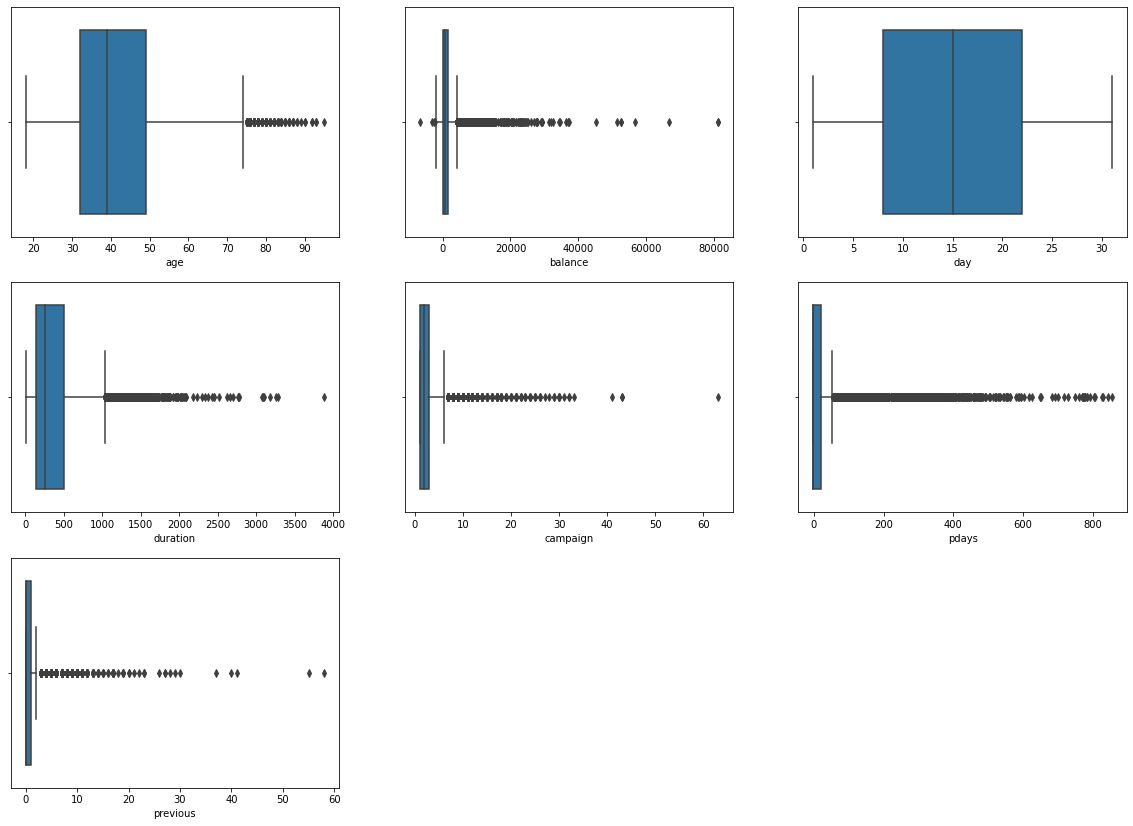

In [20]:
plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

#### Explore the correlation between numerical features

<AxesSubplot:>

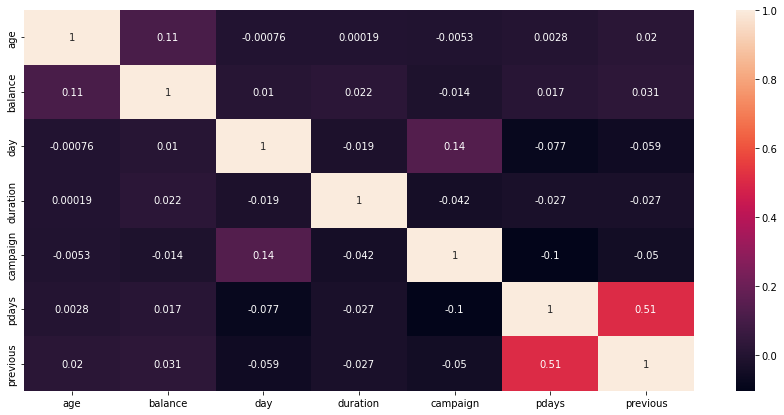

In [21]:
cor_mat = df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

#### Check the data set is balanced  or not based on target values in classification

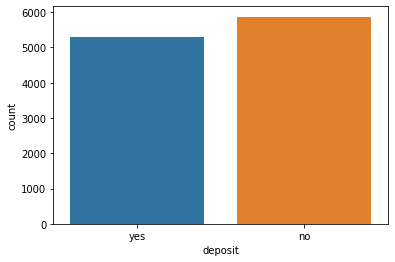

In [22]:
sns.countplot(x='deposit',data = df)
plt.show()

In [23]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

## Feature Engineering

In [24]:
df2=df.copy()

In [25]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [26]:
df2.shape

(11162, 17)

In [27]:
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [28]:
df2.drop(['default'],axis=1, inplace=True)

In [29]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [30]:
df2.drop(['pdays'],axis=1,inplace=True)

In [31]:
df2.groupby('age', sort=True)['age'].count()

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [32]:
df2.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [33]:
df2.groupby(['deposit','duration'], sort=True)['duration'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [34]:
df2.groupby(['deposit','campaign'], sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [35]:
df3 = df2[df2['campaign']<33]

In [36]:
df3.groupby(['deposit','campaign'], sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [37]:
df3.groupby(['deposit','previous'], sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [42]:
df4 = df3[df3['previous']<31]

In [43]:
cat_columns = ['job','marital','education','contact','month','poutcome']
for col in cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col],prefix = col,prefix_sep='_',drop_first = True, dummy_na=False)], axis =1)

In [45]:
bool_columns = ['housing','loan','deposit']
for col in bool_columns:
    df4[col+'_new'] = df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col,axis=1, inplace=True)

In [47]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


## Split Dataset into training set and test set

In [48]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [49]:
len(X_train)

8921

In [50]:
len(X_test)

2231

## Model selection

In [53]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
from sklearn.model_selection import cross_val_score
model_score = cross_val_score(estimator = RandomForestClassifier(),X=X_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

[0.85378151 0.84697309 0.84753363 0.85986547 0.85257848]
0.8521464370501564


In [55]:
from sklearn.model_selection import cross_val_score
model_score = cross_val_score(estimator=XGBClassifier(),X=X_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

[0.85546218 0.85706278 0.84248879 0.85201794 0.85313901]
0.8520341410106644


In [59]:
 model_param ={
     'RandomForestClassifier':{
         'model':RandomForestClassifier(),
         'param':{
             'n_estimators':[10,50,100,130],
             'criterion':['gini','entropy'],
             'max_depth': range(2,4,1),
             'max_features':['auto','log2']
         }
     },
         
     'XGBClassifier':{
         'model':XGBClassifier(objective='binary:logistic'),
         'param':{
             'learning_rate': [0.5, 0.1, 0.01, 0.001],
             'max_depth': [3,5,10,20],
             'n_estimators':[10,50,100,200]
         }
     }
 }   

In [63]:
scores =[]
for model_name, np in model_param.items():
    model_selection = GridSearchCV(estimator=np['model'],param_grid=np['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\RPH\Desktop\New folder\python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

In [64]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.7397896738376685,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.8154667717225481,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}}]

## Model Building

In [65]:
model_xgb = XGBClassifier(objective = 'binary:logistic', learning_rate=0.1,max_depth=10,n_estimators=100)

In [66]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
model_xgb.score(X_test,y_test)

0.8583594800537876

In [76]:
headers = ['name','score']
values = sorted(zip(X_train.columns,model_xgb.feature_importances_), key=lambda x:x[1]*-1)
xgb_feature_importances = pd.DataFrame(values,columns = headers)

fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['names'])
plt.xticks(rotation=90)
plt.title('Feature importances(XGB)')
plt.show()

AttributeError: 'dict' object has no attribute 'range'

<Figure size 1080x504 with 0 Axes>

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_xgb.predict(X_test))
cm

array([[988, 191],
       [125, 927]], dtype=int64)

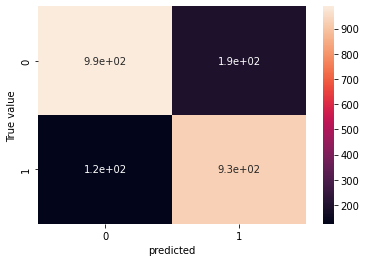

In [78]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('True value')
plt.show()